## Exploration 1: Epidemiology Model
#### Rowan Nolan, Perry Xie, Dean Ben-Zour, Akshita Bafna, Rajvir Mann


#### Initial SIR Calculation

Introduction 

Hello! Our Exploration 1 is about Epidemiology Models. With the coming of the current pandemic, it has become very important for us to understand the expected patterns and algorithms that occur, as every day is costly. We have created a program to represent the SIR model- that is the spread of disease model.
Our variables are  the susceptible(sus_num), the infected(inf_num), and the recovered(recov_num)  number of people, from a total of the population. Other additional variables are the deceased number of people (deceas_num) and the vaccinated number of people (vaccin_num), to give our model a more realistic approach. By the addition of these variables, we are able to realistically estimate the S, I and R variables. 
To insure our variables are interpreted fairly, we make a few assumptions about the model. 
The deceased amount of people are not subtracted from the overall population. It’s just another group of people, like susceptible or infected people.
The infection rate and the recovery rate is assumed to be constant throughout the time span specified (days). In other words, the infection rate and recovery rate entered is the average rate of infections and recoveries. 
Similarly, the deceased rate and the vaccinated rate are also assumed to be constant throughout the time span specified. 

Using the program we have worked on, we can now find the number of susceptible, infected, recovered, vaccinated and deceased people. And, using this information for differing variables, we can interpret the effect of the infected and recovery rates on the different groups of people.
Given below are the formulas for susceptible, infected and recovered number of people. 

$S_{t+1} = S_t - \beta \frac{I_tS_t}{N}$

$I_{t+1} = I_t + \beta \frac$

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [ ]:
def calc_sus(population, infected, susceptible, inf_rate):
    sus = susceptible - inf_rate*((infected*susceptible)/population)
    return sus

def calc_inf(population, infected, susceptible, inf_rate, recov_rate):
    inf = infected + inf_rate*((infected*susceptible)/population) - recov_rate*infected
    return inf
    
def calc_recov(infected, recovered, recov_rate):
    recovered = recovered + recov_rate*infected
    return recovered

# Run recovery until no more infected people
# Called when susceptible less than 0
def run_calc_recov(infected, recovered, recov_rate, day, sus_list, inf_list, recov_list):
    while infected > 0:
        recov_temp = calc_recov(infected,
                               recovered,
                               recov_rate)
        
        infected = infected - recov_temp
        recovered = recov_temp
        
        day += 1
        # If there is no more infected people, everyone is recovered
        if infected <= 0:
            print('Day2 {}: 0 Susceptible, 0 Infected, {} Recovered'.format(day-1, recovered))
            
            sus_list.append(0)
            inf_list.append(0)
            inf_list.append(recovered)
            return sus_list, inf_list, recov_list
        
        print('Day {}: 0 Susceptible, {} Infected, {} Recovered'.
             format(day-1, round(infected, 0), round(recovered, 0)))
        
        sus_list.append(0)
        inf_list.append(infected)
        inf_list.append(recovered)
        
        return sus_list, inf_list, recov_list 
        



def calc_sir(population, inf_day_zero, inf_rate, recov_rate, days):
    sus_num = population - inf_day_zero  # Susceptible day 0
    inf_num = inf_day_zero               # Infected day 0
    recov_num = 0                        # Recovered day 0
    print(f'Day 0: {sus_num} Susceptible, {inf_num} Infected')
    
    sus_list = [sus_num]
    inf_list = [inf_num]
    recov_list = [recov_num]
    
    for i in range(1, days+1):
        sus_temp = calc_sus(population = population,
                          infected = inf_num, 
                          susceptible = sus_num, 
                          inf_rate = inf_rate)
        
        inf_temp = calc_inf(population = population,
                          infected = inf_num, 
                          susceptible = sus_num,
                          inf_rate = inf_rate,
                          recov_rate = recov_rate)
        recov_temp = calc_recov(infected = inf_num,
                               recovered = recov_num,
                               recov_rate = recov_rate)
                
        sus_num = sus_temp
        inf_num = inf_temp
        recov_num = recov_temp
        
        sus_list.append(round(sus_num, 2))
        inf_list.append(inf_num)
        recov_list.append(recov_num)
        
        # Check if conditions are logical (ie. no negative people susceptible/infected)
        # Checks if there are no more susceptible people
        if sus_num <= 0:
            return run_calc_recov(infected = inf_num,
                          recovered = recov_num, 
                          recov_rate = recov_rate,
                          day = i,
                          sus_list = sus_list,
                          inf_list = inf_list,
                          recov_list = recov_list)
        
        # Check if there are no more infected people
        if inf_num <= 0:
            inf_num = 0
            print('Day {}: {} Susceptible, {} Infected, {} Recovered'.
            format(i, round(sus_num, 0), round(inf_num, 0), round(recov_num, 0)))    
            break               
        
        print('Day {}: {} Susceptible, {} Infected, {} Recovered'.
             format(i, round(sus_num, 0), round(inf_num, 0), round(recov_num, 0)))
        
    return sus_list, inf_list, recov_list

For our first run of the code, we have:

```
population = 1000000
infect_day1 = 1000
inf_rate = 2.2
rec_rate = .2
```

We print every day requested until there are 

In [ ]:
population = 1000000
infect_day0 = 1000
inf_rate = 2.2
rec_rate = .2

sus_list, inf_list, recov_list = calc_sir(population = population, 
        inf_day_zero = infect_day0,
        inf_rate = inf_rate,
        recov_rate = rec_rate,
        days = 20)

Day 0: 999000 Susceptible, 1000 Infected
Day 1: 996802.0 Susceptible, 2998.0 Infected, 200.0 Recovered
Day 2: 990228.0 Susceptible, 8972.0 Infected, 800.0 Recovered
Day 3: 970682.0 Susceptible, 26724.0 Infected, 2594.0 Recovered
Day 4: 913613.0 Susceptible, 78448.0 Infected, 7939.0 Recovered
Day 5: 755935.0 Susceptible, 220436.0 Infected, 23629.0 Recovered
Day 6: 389338.0 Susceptible, 542947.0 Infected, 67716.0 Recovered
Day 7: 0 Susceptible, 543226.0 Infected, 356188.0 Recovered


#### Changing the values of $\beta$ (infection rate) and $\gamma$ (recovery rate)
Intuitively, we see that the infection rate and recovery rate are dependent on one another; Specifically, looking at the equation for calc_inf, we see that the number of infected individuals are impacted by both variables:

```
def calc_inf(population, infected, susceptible, inf_rate, recov_rate):
    inf = infected + inf_rate*((infected*susceptible)/population) - recov_rate*infected
    return inf
```
Therefore, changing one variable or the other is less impactful than examining the ratio of $\beta$ to $\gamma$.


# Basic reproduction number = 1

Our first case would be a ratio of $\beta/\gamma = 1$.



In [ ]:
population = 1000000
infect_day1 = 50000
inf_rate = .8
rec_rate = .8

sus_list, inf_list, recov_list = calc_sir(population = population, 
        inf_day_zero = infect_day1,
        inf_rate = inf_rate,
        recov_rate = rec_rate,
        days = 20)
print('Basic reproduction number: {}'.format(inf_rate/rec_rate))

Day 0: 950000 Susceptible, 50000 Infected
Day 1: 912000.0 Susceptible, 48000.0 Infected, 40000.0 Recovered
Day 2: 876979.0 Susceptible, 44621.0 Infected, 78400.0 Recovered
Day 3: 845674.0 Susceptible, 40229.0 Infected, 114097.0 Recovered
Day 4: 818457.0 Susceptible, 35263.0 Infected, 146280.0 Recovered
Day 5: 795368.0 Susceptible, 30141.0 Infected, 174490.0 Recovered
Day 6: 776190.0 Susceptible, 25207.0 Infected, 198603.0 Recovered
Day 7: 760537.0 Susceptible, 20694.0 Infected, 218769.0 Recovered
Day 8: 747947.0 Susceptible, 16729.0 Infected, 235324.0 Recovered
Day 9: 737937.0 Susceptible, 13356.0 Infected, 248707.0 Recovered
Day 10: 730052.0 Susceptible, 10556.0 Infected, 259392.0 Recovered
Day 11: 723887.0 Susceptible, 8276.0 Infected, 267837.0 Recovered
Day 12: 719094.0 Susceptible, 6448.0 Infected, 274458.0 Recovered
Day 13: 715384.0 Susceptible, 4999.0 Infected, 279617.0 Recovered
Day 14: 712523.0 Susceptible, 3861.0 Infected, 283616.0 Recovered
Day 15: 710323.0 Susceptible, 2973.

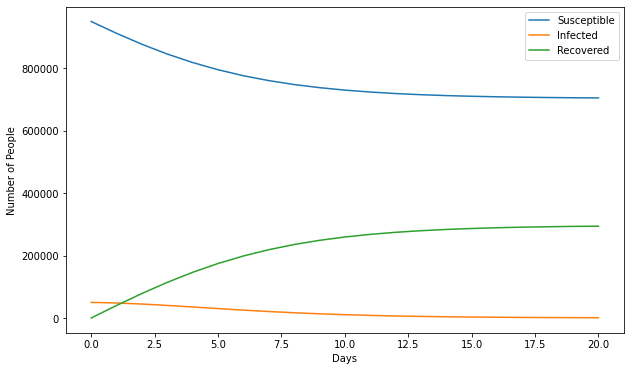

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

ax.plot(sus_list, label='Susceptible')
ax.plot(inf_list, label='Infected')
ax.plot(recov_list, label='Recovered')
ax.set_xlabel('Days')
ax.set_ylabel('Number of People')

plt.ticklabel_format(useOffset=False, style='plain')
plt.legend()
plt.show()

# Basic reproduction number < 1

In [ ]:
population = 100000
infect_day1 = 25000
inf_rate = 1
rec_rate = 2

sus_list, inf_list, recov_list = calc_sir(population = population, 
        inf_day_zero = infect_day1,
        inf_rate = inf_rate,
        recov_rate = rec_rate,
        days = 20)
print('Basic reproduction number: {}'.format(inf_rate/rec_rate))

Day 0: 75000 Susceptible, 25000 Infected
Day 1: 56250.0 Susceptible, 0 Infected, 50000 Recovered
Basic reproduction number: 0.5


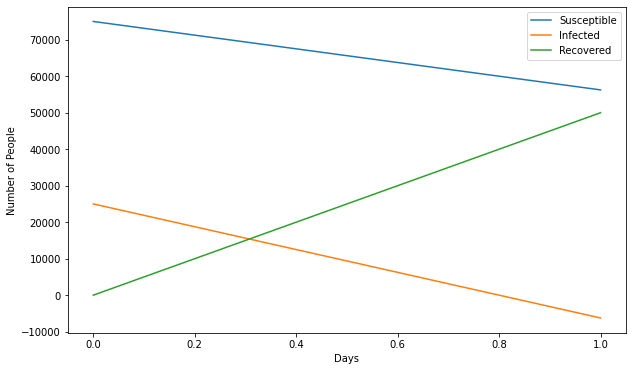

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

ax.plot(sus_list, label='Susceptible')
ax.plot(inf_list, label='Infected')
ax.plot(recov_list, label='Recovered')
ax.set_xlabel('Days')
ax.set_ylabel('Number of People')


plt.ticklabel_format(useOffset=False, style='plain')
plt.legend()
plt.show()

In this example, we show that having $\beta/\gamma < 1$ results in a disease which would be cured worldwide within the first day.
We can generalize this to say that if $\beta < \gamma$, the basic reproduction number will be less than one, and more people will recover every day than are infected.

# Basic reproduction number > 1

In [ ]:
population = 1000000
infect_day1 = 50000
inf_rate = 2
rec_rate = 1

sus_list, inf_list, recov_list = calc_sir(population = population, 
        inf_day_zero = infect_day1,
        inf_rate = inf_rate,
        recov_rate = rec_rate,
        days = 20)
print('Basic reproduction number: {}'.format(inf_rate/rec_rate))

Day 0: 950000 Susceptible, 50000 Infected
Day 1: 855000.0 Susceptible, 95000.0 Infected, 50000 Recovered
Day 2: 692550.0 Susceptible, 162450.0 Infected, 145000.0 Recovered
Day 3: 467541.0 Susceptible, 225009.0 Infected, 307450.0 Recovered
Day 4: 257138.0 Susceptible, 210402.0 Infected, 532459.0 Recovered
Day 5: 148933.0 Susceptible, 108205.0 Infected, 742862.0 Recovered
Day 6: 116703.0 Susceptible, 32231.0 Infected, 851067.0 Recovered
Day 7: 109180.0 Susceptible, 7523.0 Infected, 883297.0 Recovered
Day 8: 107537.0 Susceptible, 1643.0 Infected, 890820.0 Recovered
Day 9: 107184.0 Susceptible, 353.0 Infected, 892463.0 Recovered
Day 10: 107108.0 Susceptible, 76.0 Infected, 892816.0 Recovered
Day 11: 107092.0 Susceptible, 16.0 Infected, 892892.0 Recovered
Day 12: 107089.0 Susceptible, 3.0 Infected, 892908.0 Recovered
Day 13: 107088.0 Susceptible, 1.0 Infected, 892911.0 Recovered
Day 14: 107088.0 Susceptible, 0.0 Infected, 892912.0 Recovered
Day 15: 107088.0 Susceptible, 0.0 Infected, 892912

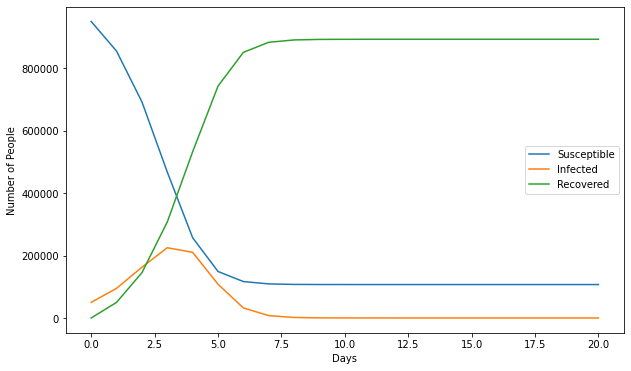

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

ax.plot(sus_list, label='Susceptible')
ax.plot(inf_list, label='Infected')
ax.plot(recov_list, label='Recovered')
ax.set_xlabel('Days')
ax.set_ylabel('Number of People')


plt.ticklabel_format(useOffset=False, style='plain')
plt.legend()
plt.show()

###SIRVD Calculation (Adding Vaccinated and Deceased)

In [ ]:
def calc_sirdv(population, inf_day_zero, inf_rate, recov_rate, deceas_rate, vaccin_rate, days):
    # This is number fo people susceptible day 0
    sus_num = population - inf_day_zero
    # This is the number of people infected day 0
    inf_num = inf_day_zero
    recov_num = 0
    print(f'Day 0: {sus_num} Susceptible, {inf_num} Infected')
    vaccin_num = 0
    deceas_num = 0

    sus_list = [sus_num]
    inf_list = [inf_num]
    recov_list = [recov_num]
    vaccine_list = [vaccin_num]
    deceas_list = [deceas_num]

    for i in range(1, days+1): #Calculating SIR the same way
        sus_temp = calc_sus(population = population,
                          infected = inf_num, 
                          susceptible = sus_num, 
                          inf_rate = inf_rate)
        
        inf_temp = calc_inf(population = population,
                          infected = inf_num, 
                          susceptible = sus_num,
                          inf_rate = inf_rate,
                          recov_rate = recov_rate)
        recov_temp = calc_recov(infected = inf_num,
                               recovered = recov_num,
                               recov_rate = recov_rate)
        sus_num = int(sus_temp)
        inf_num = int(inf_temp)
        recov_num = int(recov_temp)

        if i >=10 and inf_num >0: # This gives an offset to the deceased count
          deceas_today = int(inf_num*deceas_rate)
          deceas_num += deceas_today
          inf_num = inf_num-deceas_today
        if i >=100 and sus_num >0: # This gives an offset to the vaccinated count
          vaccin_today = int(sus_num*vaccin_rate)
          vaccin_num += vaccin_today
          sus_num = sus_num-vaccin_today
        
        print(f'Day {i}: {sus_num} Susceptible, {inf_num} Infected, {vaccin_num} Vaccinated, {deceas_num} Deceased, {recov_num} Recovered') 
      
        sus_list.append(round(sus_num, 2))
        inf_list.append(inf_num)
        recov_list.append(recov_num)
        deceas_list.append(deceas_num)
        vaccine_list.append(vaccin_num)
        

    print(f'Day {i}: {sus_num} Susceptible, {inf_num} Infected, {vaccin_num} Vaccinated, {deceas_num} Deceased, {recov_num} Recovered')
        
    return sus_list, inf_list, recov_list, deceas_list, vaccine_list

In this scenario, we have two new variables, deceas_rate and vaccin_rate.  We can derive a few new ratios out of these, particularly a fatality rate:

deceas_rate / inf_rate = fatality rate

For our first example, our deceas_rate is $.01$, and our inf_rate (from the last run of the original code) is $1$.

Therefore, we have a fatality rate of $.01/1$, or simply $.01$.

In [ ]:
deceas_rate = .01
vaccin_rate = 0.005
inf_rate = 0.1
rec_rate = 0.2


sus_list, inf_list, recov_list, deceas_list, vaccine_list = calc_sirdv(population = population, 
        inf_day_zero = infect_day1,
        inf_rate = inf_rate,
        recov_rate = rec_rate,
        deceas_rate = deceas_rate,
        vaccin_rate = vaccin_rate,
        days = 120)

Day 0: 75000 Susceptible, 25000 Infected
Day 1: 73125 Susceptible, 21875 Infected, 0 Vaccinated, 0 Deceased, 5000 Recovered
Day 2: 71525 Susceptible, 19099 Infected, 0 Vaccinated, 0 Deceased, 9375 Recovered
Day 3: 70158 Susceptible, 16645 Infected, 0 Vaccinated, 0 Deceased, 13194 Recovered
Day 4: 68990 Susceptible, 14483 Infected, 0 Vaccinated, 0 Deceased, 16523 Recovered
Day 5: 67990 Susceptible, 12585 Infected, 0 Vaccinated, 0 Deceased, 19419 Recovered
Day 6: 67134 Susceptible, 10923 Infected, 0 Vaccinated, 0 Deceased, 21936 Recovered
Day 7: 66400 Susceptible, 9471 Infected, 0 Vaccinated, 0 Deceased, 24120 Recovered
Day 8: 65771 Susceptible, 8205 Infected, 0 Vaccinated, 0 Deceased, 26014 Recovered
Day 9: 65231 Susceptible, 7103 Infected, 0 Vaccinated, 0 Deceased, 27655 Recovered
Day 10: 64767 Susceptible, 6084 Infected, 0 Vaccinated, 61 Deceased, 29075 Recovered
Day 11: 64372 Susceptible, 5209 Infected, 0 Vaccinated, 113 Deceased, 30291 Recovered
Day 12: 64036 Susceptible, 4457 Infec

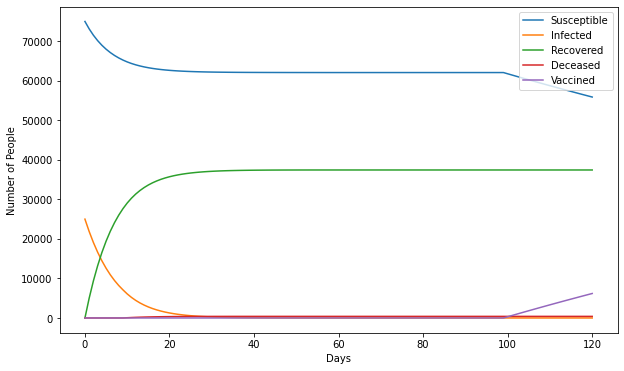

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

ax.plot(sus_list, label='Susceptible')
ax.plot(inf_list, label='Infected')
ax.plot(recov_list, label='Recovered')
ax.plot(deceas_list, label='Deceased')
ax.plot(vaccine_list, label='Vaccined')
ax.set_xlabel('Days')
ax.set_ylabel('Number of People')


plt.ticklabel_format(useOffset=False, style='plain')
plt.legend(loc='upper right')
plt.show()

###Summary
In this exploration on epidemiology models, we developed 2 calculations. the Susceptible Infected and Recovered calculation and the Susceptible Infected Recovered Vaccinated and Deceased calculation, or the SIR and SIRVD calculations. In the SIR calculation, wrote out several functions to find the values for the susceptible, infected and recovered. Then, we ran those values through for loops to simulate the results of each day based on the infection and recovery rate. For the SIRVD calculation, we ran a similar calculation, but now adding vaccination and deceased rates and populations to create a more accurate representation of the events that occur within a pandemic. Based on our test cases of our SIR and SIRVD calculations, we were able to see that the infection and recovery rates have a very large impact even when the deceased and vaccine rates are included, and the changes of those rates yields drastic differences in the calculation.